In [1]:
import torch

In [2]:
x = torch.rand(3,3)

print(x)

tensor([[0.4600, 0.6550, 0.4563],
        [0.7168, 0.5342, 0.0400],
        [0.7871, 0.4710, 0.7932]])


In [3]:
print(x[:,2])

tensor([0.4563, 0.0400, 0.7932])


In [4]:
y = x.view(9) # reshape 
print(y)

tensor([0.4600, 0.6550, 0.4563, 0.7168, 0.5342, 0.0400, 0.7871, 0.4710, 0.7932])


In [5]:
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y

In [6]:
z

tensor([[1.4600, 1.6550, 1.4563],
        [1.7168, 1.5342, 1.0400],
        [1.7871, 1.4710, 1.7932]], device='cuda:0')

In [7]:
t1 = torch.tensor([[[1,2,3],[4,5,6],[7,8,9]]])

In [8]:
t1

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [9]:
t1.shape

torch.Size([1, 3, 3])

### Tensor operators and gradients 

In [10]:
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)

In [11]:
y =w*x+b

In [13]:
print(y)

tensor(17., grad_fn=<AddBackward0>)


In [14]:
# compute derivatives 
y.backward()

In [15]:
# Display gradients 
print('dy/dx:', x.grad) # returns none because we set requires_grad to False, the default value 
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


### Interoperability with numpy 

In [18]:
import numpy as np


x = np.array([[1,2],[3,4]])

print(x)

[[1 2]
 [3 4]]


In [19]:
# Convert the numpy array to a torch tensor

y = torch.from_numpy(x)

y

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [20]:
y.shape

torch.Size([2, 2])

In [21]:
x.dtype, y.dtype

(dtype('int32'), torch.int32)

### Linear regression 

In [41]:
# Inputs (temp, rainfall, humidity)

inputs = np.array([[73,67,43],[91,88,64],[87,134,58],[102,43,37],[69,96,70]],dtype='float32')

In [42]:
# Targets (apples, oranges)

targets = np.array([[56,70],[81,101],[119,133],[22,37],[103,119]], dtype='float32')

In [43]:
# Convert to tensors 

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [44]:
# Initialize weights and biases with random variables 

w = torch.randn(2,3, requires_grad=True)
b = torch.randn(2, requires_grad=True)

print(w)
print(b)

tensor([[-0.6120,  1.0628,  0.7746],
        [ 1.8508,  1.8216, -1.1909]], requires_grad=True)
tensor([0.1716, 0.6964], requires_grad=True)


In [45]:
# Create the model 

def model(x):
    return x @ w.t() + b # @ represents matrix multiplication in pytorch 

In [46]:
preds = model(inputs) # based on random selected weights and biases 
print(preds )

tensor([[ 60.0104, 206.6443],
        [ 87.5791, 253.2033],
        [134.2670, 336.7398],
        [ 12.1099, 223.7451],
        [114.1917, 219.9124]], grad_fn=<AddBackward0>)


In [47]:
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


### Loss function 

In [48]:
# MSE loss 

def mse(t1,t2):
    df = t1 -t2 
    return torch.sum(df*df)/df.numel()

In [49]:
loss = mse(preds,targets)
print(loss)

tensor(12891.9980, grad_fn=<DivBackward0>)


In [58]:
# Compute gradients 
loss.backward()

In [59]:
# Gradient for weights 
print(w)
print(w.grad)

tensor([[-0.6120,  1.0628,  0.7746],
        [ 1.8508,  1.8216, -1.1909]], requires_grad=True)
tensor([[  396.6252,   708.5134,   379.2964],
        [13512.3711, 13513.5635,  8281.4121]])


In [60]:
print(b)
print(b.grad)

tensor([0.1716, 0.6964], requires_grad=True)
tensor([  5.4316, 156.0490])


### Adjust weights and biases using gradient descent




In [61]:
# Adjust weights & reset gradients 

with torch.no_grad():
    w -= w.grad*1e-5 
    b -= b.grad*1e-5
    w.grad.zero_()
    b.grad.zero_()

In [62]:
print(w)
print(b)

tensor([[-0.6159,  1.0557,  0.7708],
        [ 1.7157,  1.6865, -1.2738]], requires_grad=True)
tensor([0.1716, 0.6949], requires_grad=True)


In [63]:
# Calculate loss 

preds = model(inputs)
loss = mse(preds,targets)
print(loss)

tensor(8934.5576, grad_fn=<DivBackward0>)


### Train for multiple epochs

In [72]:
# Train for 10000 epochs 

for i in range(10000): 
    preds = model(inputs)
    loss = mse(preds,targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad*1e-5
        b -= b.grad*1e-5
        w.grad.zero_()
        b.grad.zero_()

In [73]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(0.5312, grad_fn=<DivBackward0>)


In [74]:
preds 

tensor([[ 57.1936,  70.4247],
        [ 82.1895, 100.5973],
        [118.6873, 132.9405],
        [ 21.0777,  37.0009],
        [101.9260, 119.1556]], grad_fn=<AddBackward0>)

In [75]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

### Linear regression using PyTorch built-ins

In [76]:
import torch.nn as nn

In [77]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [78]:
inputs.shape

torch.Size([15, 3])

In [80]:
from torch.utils.data import TensorDataset

In [81]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [82]:
from torch.utils.data import DataLoader

In [84]:
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [85]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[102.,  43.,  37.],
        [ 73.,  66.,  44.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 74.,  66.,  43.]])
tensor([[ 22.,  37.],
        [ 57.,  69.],
        [103., 119.],
        [ 56.,  70.],
        [ 57.,  69.]])


In [86]:
# Define model
model = nn.Linear(3, 2) # initialize the model 
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.3897, -0.4786, -0.4650],
        [-0.3041, -0.2984, -0.5310]], requires_grad=True)
Parameter containing:
tensor([-0.4180,  0.2633], requires_grad=True)


In [87]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3897, -0.4786, -0.4650],
         [-0.3041, -0.2984, -0.5310]], requires_grad=True),
 Parameter containing:
 tensor([-0.4180,  0.2633], requires_grad=True)]

In [88]:
# Generate predictions
preds = model(inputs)
preds

tensor([[-24.0386, -64.7596],
        [-36.8419, -87.6505],
        [-57.6275, -96.9727],
        [  1.5388, -63.2310],
        [-52.0335, -86.5338],
        [-23.1703, -64.7653],
        [-36.8283, -87.8832],
        [-57.7029, -97.8078],
        [  0.6705, -63.2253],
        [-52.8882, -86.7608],
        [-24.0250, -64.9923],
        [-35.9736, -87.6562],
        [-57.6411, -96.7400],
        [  2.3934, -63.0041],
        [-52.9018, -86.5281]], grad_fn=<AddmmBackward0>)

In [89]:
# Import nn.functional
import torch.nn.functional as F

In [90]:
# Define loss function
loss_fn = F.mse_loss

In [91]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(23489.4199, grad_fn=<MseLossBackward0>)


In [92]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [93]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [99]:
fit(100, model, loss_fn, opt, train_dl)

Epoch [10/100], Loss: 1.2256
Epoch [20/100], Loss: 1.0150
Epoch [30/100], Loss: 1.1196
Epoch [40/100], Loss: 1.5977
Epoch [50/100], Loss: 0.9331
Epoch [60/100], Loss: 1.3711
Epoch [70/100], Loss: 1.1349
Epoch [80/100], Loss: 1.3087
Epoch [90/100], Loss: 1.1484
Epoch [100/100], Loss: 0.9883


In [96]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 56.8647,  70.4675],
        [ 81.8463, 100.2914],
        [118.5272, 133.2533],
        [ 20.8895,  37.8720],
        [101.4293, 118.0550],
        [ 55.6176,  69.3822],
        [ 81.6725, 100.3448],
        [118.8089, 133.8293],
        [ 22.1367,  38.9572],
        [102.5025, 119.1936],
        [ 56.6909,  70.5209],
        [ 80.5992,  99.2062],
        [118.7011, 133.1998],
        [ 19.8163,  36.7334],
        [102.6764, 119.1402]], grad_fn=<AddmmBackward0>)

In [97]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

In [98]:
# Single prediction 

model(torch.tensor([[75, 63, 44.]]))

tensor([[53.3452, 67.5465]], grad_fn=<AddmmBackward0>)

## Working with images 

In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x2AD0D701608>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


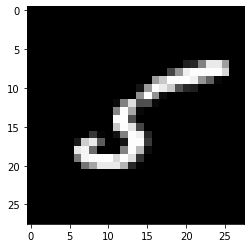

In [9]:
image, label = dataset[11]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [10]:
import torchvision.transforms as transforms

In [11]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [13]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [14]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


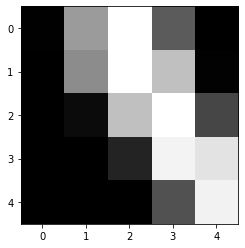

In [17]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [18]:
# Split the train data into train and validation

from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [19]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [20]:
# Initialize the model 

import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [21]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0310,  0.0016, -0.0237,  ...,  0.0117,  0.0054, -0.0242],
        [-0.0003, -0.0306,  0.0008,  ..., -0.0157,  0.0189, -0.0125],
        [ 0.0260, -0.0208,  0.0256,  ...,  0.0170, -0.0291, -0.0252],
        ...,
        [ 0.0199, -0.0030, -0.0307,  ...,  0.0031, -0.0032, -0.0231],
        [ 0.0165,  0.0134,  0.0129,  ..., -0.0183,  0.0339, -0.0062],
        [-0.0111, -0.0295, -0.0232,  ..., -0.0216,  0.0270,  0.0162]],
       requires_grad=True)

In [22]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0306,  0.0208, -0.0354,  0.0211,  0.0171, -0.0158,  0.0198,  0.0086,
        -0.0171,  0.0240], requires_grad=True)

In [24]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [25]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [26]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0163, -0.0007, -0.0208,  ...,  0.0128, -0.0223,  0.0062],
         [ 0.0254, -0.0327,  0.0331,  ...,  0.0344,  0.0260, -0.0159],
         [-0.0323,  0.0194, -0.0190,  ..., -0.0181, -0.0034, -0.0115],
         ...,
         [-0.0211, -0.0014,  0.0151,  ...,  0.0107,  0.0300, -0.0048],
         [-0.0142,  0.0312,  0.0122,  ..., -0.0007,  0.0163, -0.0235],
         [-0.0123, -0.0086,  0.0251,  ..., -0.0347, -0.0252, -0.0283]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0163,  0.0256,  0.0032,  0.0181,  0.0002,  0.0283,  0.0092,  0.0173,
         -0.0052,  0.0092], requires_grad=True)]

In [27]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.0952,  0.0292, -0.0752,  0.2429, -0.0811,  0.2506, -0.0116, -0.0214,
         -0.1629,  0.2095],
        [ 0.0455,  0.0149,  0.0046,  0.1313, -0.0067, -0.0558, -0.0282,  0.1453,
         -0.1613,  0.1938]])


In [28]:
import torch.nn.functional as F

In [29]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0874, 0.0990, 0.0892, 0.1226, 0.0887, 0.1236, 0.0951, 0.0941, 0.0817,
         0.1186],
        [0.1012, 0.0982, 0.0972, 0.1103, 0.0961, 0.0915, 0.0940, 0.1118, 0.0823,
         0.1174]])
Sum:  0.9999998807907104


In [30]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([5, 9, 3, 5, 7, 3, 4, 9, 2, 5, 1, 2, 9, 9, 5, 7, 9, 6, 5, 7, 5, 9, 9, 7,
        2, 1, 9, 5, 8, 0, 6, 6, 9, 7, 9, 9, 7, 9, 2, 9, 7, 9, 4, 7, 9, 9, 5, 3,
        1, 1, 9, 3, 3, 7, 1, 3, 5, 5, 1, 9, 9, 6, 9, 2, 5, 7, 7, 7, 9, 9, 9, 5,
        7, 7, 6, 9, 3, 9, 7, 7, 9, 3, 0, 3, 5, 7, 7, 6, 5, 9, 7, 5, 5, 9, 2, 5,
        9, 9, 9, 9, 7, 3, 7, 9, 9, 6, 9, 9, 5, 9, 6, 6, 7, 3, 7, 5, 9, 5, 0, 5,
        7, 9, 3, 1, 5, 5, 9, 9])
tensor([0.1236, 0.1174, 0.1210, 0.1310, 0.1212, 0.1119, 0.1187, 0.1627, 0.1350,
        0.1338, 0.1235, 0.1357, 0.1244, 0.1306, 0.1312, 0.1254, 0.1227, 0.1260,
        0.1258, 0.1251, 0.1224, 0.1145, 0.1387, 0.1264, 0.1208, 0.1248, 0.1399,
        0.1355, 0.1221, 0.1145, 0.1310, 0.1310, 0.1291, 0.1240, 0.1179, 0.1280,
        0.1216, 0.1274, 0.1318, 0.1265, 0.1166, 0.1524, 0.1243, 0.1134, 0.1170,
        0.1241, 0.1228, 0.1381, 0.1175, 0.1241, 0.1446, 0.1424, 0.1165, 0.1278,
        0.1144, 0.1188, 0.1275, 0.1298, 0.1263, 0.1427, 0.1282, 0.1186, 0.1315,
       

In [31]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [32]:
accuracy(outputs, labels)

tensor(0.1406)

In [33]:
loss_fn = F.cross_entropy

In [34]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3179, grad_fn=<NllLossBackward0>)


In [35]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [36]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [37]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [38]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3361852169036865, 'val_acc': 0.0579509511590004}

In [39]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9574, val_acc: 0.6226
Epoch [1], val_loss: 1.6878, val_acc: 0.7299
Epoch [2], val_loss: 1.4862, val_acc: 0.7656
Epoch [3], val_loss: 1.3334, val_acc: 0.7853
Epoch [4], val_loss: 1.2157, val_acc: 0.8008


In [40]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1230, val_acc: 0.8098
Epoch [1], val_loss: 1.0486, val_acc: 0.8170
Epoch [2], val_loss: 0.9877, val_acc: 0.8236
Epoch [3], val_loss: 0.9370, val_acc: 0.8287
Epoch [4], val_loss: 0.8942, val_acc: 0.8340


In [41]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8575, val_acc: 0.8378
Epoch [1], val_loss: 0.8256, val_acc: 0.8424
Epoch [2], val_loss: 0.7978, val_acc: 0.8449
Epoch [3], val_loss: 0.7731, val_acc: 0.8475
Epoch [4], val_loss: 0.7512, val_acc: 0.8500


In [42]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7315, val_acc: 0.8519
Epoch [1], val_loss: 0.7138, val_acc: 0.8532
Epoch [2], val_loss: 0.6976, val_acc: 0.8546
Epoch [3], val_loss: 0.6829, val_acc: 0.8565
Epoch [4], val_loss: 0.6695, val_acc: 0.8578


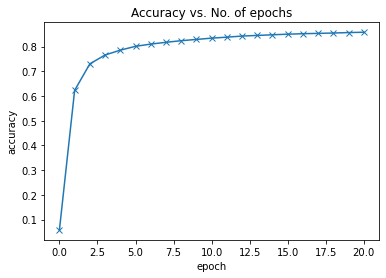

In [43]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

# Training Deep Neural Networks on GPU with Pytorch

In [44]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [45]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())


image.shape: torch.Size([1, 28, 28])
Label: 5


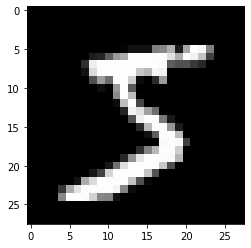

In [46]:
image, label = dataset[0]
print('image.shape:', image.shape)
plt.imshow(image.permute(1, 2, 0), cmap='gray')
print('Label:', label)

In [47]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In [48]:
batch_size=128

In [49]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

images.shape: torch.Size([128, 1, 28, 28])


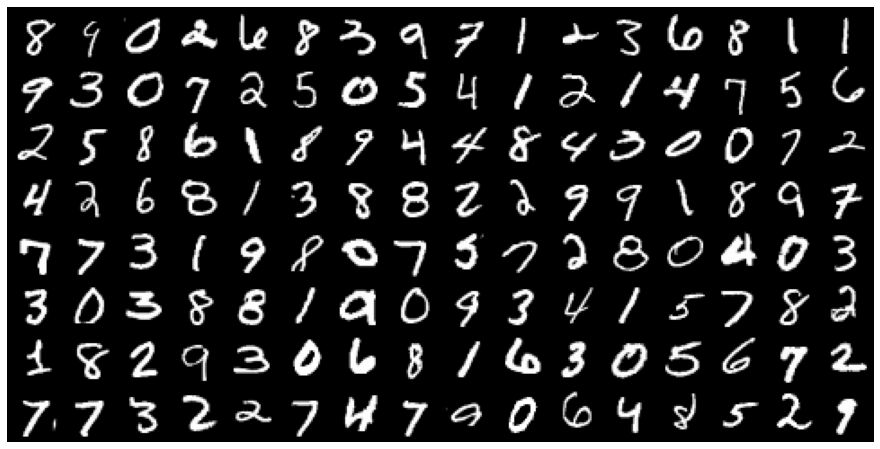

In [50]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [51]:
for images, labels in train_loader:
    print('images.shape:', images.shape)
    inputs = images.reshape(-1, 784)
    print('inputs.shape:', inputs.shape)
    break

images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


In [52]:
input_size = inputs.shape[-1]
hidden_size = 32

In [55]:
layer1 = nn.Linear(input_size, hidden_size)

In [56]:
layer1_outputs = layer1(inputs)
print('layer1_outputs.shape:', layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])


In [57]:
F.relu(torch.tensor([[1, -1, 0], 
                     [-0.1, .2, 3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

In [58]:
relu_outputs = F.relu(layer1_outputs)
print('min(layer1_outputs):', torch.min(layer1_outputs).item())
print('min(relu_outputs):', torch.min(relu_outputs).item())

min(layer1_outputs): -0.712005615234375
min(relu_outputs): 0.0


In [59]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)

In [60]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)

torch.Size([128, 10])


In [61]:
F.cross_entropy(layer2_outputs, labels)

tensor(2.3127, grad_fn=<NllLossBackward0>)

In [62]:
# Expanded version of layer2(F.relu(layer1(inputs)))
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias)) @ layer2.weight.t() + layer2.bias

In [63]:
# Same as layer2(layer1(inputs))
outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias

In [64]:
# Create a single layer to replace the two linear layers
combined_layer = nn.Linear(input_size, output_size)

combined_layer.weight.data = layer2.weight @ layer1.weight
combined_layer.bias.data = layer1.bias @ layer2.weight.t() + layer2.bias

In [65]:
# Same as combined_layer(inputs)
outputs3 = inputs @ combined_layer.weight.t() + combined_layer.bias

### Create the necessary classes and functions 

In [66]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__() # inherits all attributes and methods of nn.Module 
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [67]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
### Create a model based on the above class 

In [68]:
input_size = 784
hidden_size = 32 # you can change this
num_classes = 10

In [69]:
model = MnistModel(input_size, hidden_size=32, out_size=num_classes)


In [70]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [71]:
## using gpu 

torch.cuda.is_available()

True

In [72]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [73]:
device = get_default_device()
device

device(type='cuda')

In [74]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [75]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([128, 1, 28, 28])
cuda:0


In [76]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [77]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

### Train the model 



In [78]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [79]:
# Model (on GPU)
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [80]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.3080010414123535, 'val_acc': 0.09462890774011612}]

In [81]:
history += fit(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2167, val_acc: 0.9334
Epoch [1], val_loss: 0.1592, val_acc: 0.9530
Epoch [2], val_loss: 0.1331, val_acc: 0.9603
Epoch [3], val_loss: 0.1428, val_acc: 0.9569
Epoch [4], val_loss: 0.1259, val_acc: 0.9617


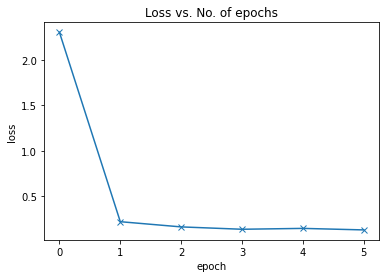

In [82]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

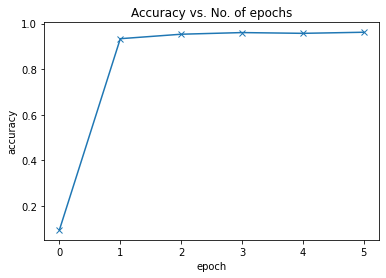

In [83]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [84]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=ToTensor())

In [85]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.12245643138885498, 'val_acc': 0.963183581829071}

### CNN

1.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

4.4%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

6.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

9.5%IOPub mes

94.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

97.4%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



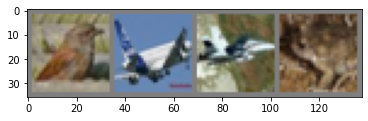

Epoch [1/5], Step [2000/12500], Loss: 2.3042
Epoch [1/5], Step [4000/12500], Loss: 2.3119
Epoch [1/5], Step [6000/12500], Loss: 2.2765
Epoch [1/5], Step [8000/12500], Loss: 2.3187
Epoch [1/5], Step [10000/12500], Loss: 2.1365
Epoch [1/5], Step [12000/12500], Loss: 2.5305
Epoch [2/5], Step [2000/12500], Loss: 2.3102
Epoch [2/5], Step [4000/12500], Loss: 1.8193
Epoch [2/5], Step [6000/12500], Loss: 1.9025
Epoch [2/5], Step [8000/12500], Loss: 2.2001
Epoch [2/5], Step [10000/12500], Loss: 1.7217
Epoch [2/5], Step [12000/12500], Loss: 1.7501
Epoch [3/5], Step [2000/12500], Loss: 2.4874
Epoch [3/5], Step [4000/12500], Loss: 1.4900
Epoch [3/5], Step [6000/12500], Loss: 1.6159
Epoch [3/5], Step [8000/12500], Loss: 0.9887
Epoch [3/5], Step [10000/12500], Loss: 1.5593
Epoch [3/5], Step [12000/12500], Loss: 1.6331
Epoch [4/5], Step [2000/12500], Loss: 1.3072
Epoch [4/5], Step [4000/12500], Loss: 1.8299
Epoch [4/5], Step [6000/12500], Loss: 1.1792
Epoch [4/5], Step [8000/12500], Loss: 1.0376
Epoc

In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

#### Using Pytorch sequential 

In [90]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F 
import torch.backends.cudnn as cudnn 

import torchvision 
import torchvision.transforms as transforms 

import matplotlib.pyplot as plt 
import numpy as np 

In [91]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='../data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='../data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)


100.0%


Extracting ../data\cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [93]:
class CNN(nn.Module):
    
    def __init__(self,n_inputs,n_outputs):
        super().__init__()
        
        self.main = nn.Sequential(
            nn.Conv2d(n_inputs, 16, kernel_size=5, stride=2, padding=0),
            nn.ReLU(inplace=True),
            nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=0),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 64, kernel_size=5, stride=2, padding=0),
            nn.ReLU(inplace=True),
        )
        
        self.mlp = nn.Sequential(
            nn.Linear(64, 32),
            nn.LeakyReLU(inplace=True),
            nn.Linear(32, n_outputs)
        )
        
    def forward(self, x):
        batch_size = x.shape[0]
        x = self.main(x) # x shape [batch_size, 64, 1, 1]
        x = x.view(batch_size,-1)
        
        return self.mlp(x)

In [94]:
net = CNN(n_inputs=3,n_outputs=10).cuda()

In [95]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [100]:
for epoch in range(5):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0): 
        # get the inputs 
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        
        # zero the parameter gradients 
        optimizer.zero_grad()
        
        
        # forward + backward + optimize 
        outputs = net(images)
        loss= criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics 
        running_loss += loss.item()
        if i % 2000 == 1999: 
            print('[%d, %5d] loss: %.3f' %
                  (epoch +1, i+1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 1.887
[1,  4000] loss: 1.660
[1,  6000] loss: 1.547
[1,  8000] loss: 1.495
[1, 10000] loss: 1.470
[1, 12000] loss: 1.442
[2,  2000] loss: 1.378
[2,  4000] loss: 1.351
[2,  6000] loss: 1.351
[2,  8000] loss: 1.335
[2, 10000] loss: 1.296
[2, 12000] loss: 1.324
[3,  2000] loss: 1.255
[3,  4000] loss: 1.258
[3,  6000] loss: 1.250
[3,  8000] loss: 1.236
[3, 10000] loss: 1.231
[3, 12000] loss: 1.240
[4,  2000] loss: 1.162
[4,  4000] loss: 1.179
[4,  6000] loss: 1.177
[4,  8000] loss: 1.180
[4, 10000] loss: 1.189
[4, 12000] loss: 1.167
[5,  2000] loss: 1.102
[5,  4000] loss: 1.132
[5,  6000] loss: 1.120
[5,  8000] loss: 1.126
[5, 10000] loss: 1.121
[5, 12000] loss: 1.152
Finished Training


In [101]:
def get_quality(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.cuda(), labels.cuda()
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    print('Accuracy of the network on test images: %d %%' % (100*correct/total))

In [102]:
get_quality(net)

Accuracy of the network on test images: 57 %
